Importing all necessary modules

In [ ]:
import os
from operator import itemgetter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils, to_categorical

from keras.datasets import imdb



```
# This is formatted as code
```

IMDB data loading

In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

*Vectorizing* the data

In [ ]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
print("y_train ", y_train.shape)
print("y_test ", y_test.shape)

y_train  (25000,)
y_test  (25000,)


In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]



```
# This is formatted as code
```

Building a model with two hidden layers, 16 hidden units, and the relu activation function

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16,  activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Compiling the model using rnsprob optimizer and binary crossentropy loss function

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)
print("_"*100)
print("Test Loss and Accuracy")
print("results ", results)
history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 [==============================] - 3s 85ms/step - loss: 0.5443 - acc: 0.7663 - val_loss: 0.4053 - val_acc: 0.8663
Epoch 2/20
30/30 [==============================] - 1s 30ms/step - loss: 0.3337 - acc: 0.8900 - val_loss: 0.3153 - val_acc: 0.8866
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2472 - acc: 0.9194 - val_loss: 0.2894 - val_acc: 0.8878
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1977 - acc: 0.9352 - val_loss: 0.3111 - val_acc: 0.8768
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1655 - acc: 0.9456 - val_loss: 0.2794 - val_acc: 0.8893
Epoch 6/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1405 - acc: 0.9557 - val_loss: 0.3026 - val_acc: 0.8830
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1217 - acc: 0.9618 - val_loss: 0.3027 - val_acc: 0.8859
Epoch 8/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1002 - a

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

plotting training and validation accuracy

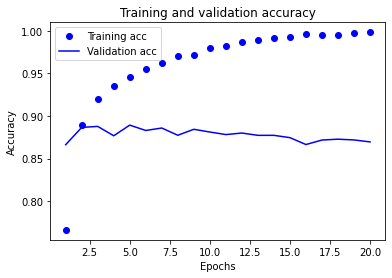

In [ ]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, (len(history_dict['acc']) + 1))
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plotting training and validation loss

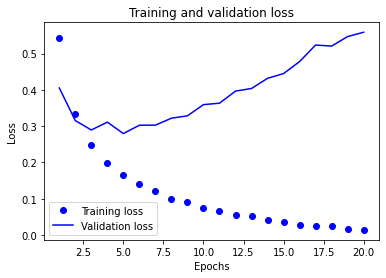

In [ ]:
plt.clf()
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (len(history_dict['loss']) + 1))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Building model using one hidden layer with 16 hidden units and relu activation function

In [ ]:
model_1 = models.Sequential()
model.add(layers.Dense(16,  activation='relu', input_shape=(10000,)))
model_1.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model_1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history_1 = model_1.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

results_1 = model_1.evaluate(x_test, y_test)
print("_"*100)
print("Test Loss and Accuracy")
print("results_1 ", results_1)
history_dict_1 = history_1.history
history_dict_1.keys()

Epoch 1/20
30/30 [==============================] - 1s 25ms/step - loss: 0.6123 - acc: 0.7555 - val_loss: 0.5602 - val_acc: 0.8160
Epoch 2/20
30/30 [==============================] - 0s 12ms/step - loss: 0.5154 - acc: 0.8459 - val_loss: 0.4989 - val_acc: 0.8360
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.4553 - acc: 0.8670 - val_loss: 0.4527 - val_acc: 0.8534
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.4104 - acc: 0.8835 - val_loss: 0.4193 - val_acc: 0.8623
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.3757 - acc: 0.8929 - val_loss: 0.3936 - val_acc: 0.8672
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3477 - acc: 0.8998 - val_loss: 0.3733 - val_acc: 0.8717
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3248 - acc: 0.9063 - val_loss: 0.3572 - val_acc: 0.8759
Epoch 8/20
30/30 [==============================] - 0s 11ms/step - loss: 0.3056 - a

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Building model using three hidden layer with 16 hidden units and relu activation function

In [ ]:
model_2 = models.Sequential()
model_2.add(layers.Dense(16,  activation='relu', input_shape=(10000,)))
model_2.add(layers.Dense(16, activation='relu'))
model_2.add(layers.Dense(16, activation='relu'))
model_2.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model_2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history_2 = model_2.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

results_2 = model_2.evaluate(x_test, y_test)
print("_"*100)
print("Test Loss and Accuracy")
print("results_2 ", results_2)
history_dict_2 = history_2.history
history_dict_2.keys()

Epoch 1/20
30/30 [==============================] - 3s 69ms/step - loss: 0.5621 - acc: 0.7546 - val_loss: 0.4215 - val_acc: 0.8633
Epoch 2/20
30/30 [==============================] - 3s 97ms/step - loss: 0.3421 - acc: 0.8889 - val_loss: 0.3426 - val_acc: 0.8630
Epoch 3/20
30/30 [==============================] - 1s 42ms/step - loss: 0.2518 - acc: 0.9139 - val_loss: 0.2914 - val_acc: 0.8846
Epoch 4/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1994 - acc: 0.9307 - val_loss: 0.2811 - val_acc: 0.8859
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1642 - acc: 0.9449 - val_loss: 0.2830 - val_acc: 0.8855
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1377 - acc: 0.9549 - val_loss: 0.3576 - val_acc: 0.8639
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1186 - acc: 0.9618 - val_loss: 0.3099 - val_acc: 0.8843
Epoch 8/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0982 - a

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Now lets try with 32 hidden units instead of 16 and one hidden layer

In [ ]:
model_3 = models.Sequential()
model_3.add(layers.Dense(32,  activation='relu', input_shape=(10000,)))
model_3.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model_3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history_3 = model_3.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

results_3 = model_3.evaluate(x_test, y_test)
print("_"*100)
print("Test Loss and Accuracy")
print("results_3 ", results_3)
history_dict_3 = history_3.history
history_dict_3.keys()

Epoch 1/20
30/30 [==============================] - 2s 40ms/step - loss: 0.4983 - acc: 0.7938 - val_loss: 0.3752 - val_acc: 0.8722
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3177 - acc: 0.8930 - val_loss: 0.3133 - val_acc: 0.8848
Epoch 3/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2515 - acc: 0.9165 - val_loss: 0.3017 - val_acc: 0.8780
Epoch 4/20
30/30 [==============================] - 1s 30ms/step - loss: 0.2130 - acc: 0.9281 - val_loss: 0.2818 - val_acc: 0.8871
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1847 - acc: 0.9393 - val_loss: 0.2742 - val_acc: 0.8889
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1637 - acc: 0.9491 - val_loss: 0.2828 - val_acc: 0.8842
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1476 - acc: 0.9537 - val_loss: 0.2802 - val_acc: 0.8851
Epoch 8/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1330 - a

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Now lets try with 64 units and one hidden layer


In [ ]:
model_4 = models.Sequential()
model_4.add(layers.Dense(64,  activation='relu', input_shape=(10000,)))
model_4.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model_4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history_4 = model_4.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

results_4 = model_4.evaluate(x_test, y_test)
print("_"*100)
print("Test Loss and Accuracy")
print("results_4 ", results_4)
history_dict_4 = history_4.history
history_dict_4.keys()

Epoch 1/20
30/30 [==============================] - 3s 83ms/step - loss: 0.4924 - acc: 0.7815 - val_loss: 0.4074 - val_acc: 0.8274
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3077 - acc: 0.8915 - val_loss: 0.3252 - val_acc: 0.8712
Epoch 3/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2421 - acc: 0.9146 - val_loss: 0.2858 - val_acc: 0.8879
Epoch 4/20
30/30 [==============================] - 1s 44ms/step - loss: 0.2047 - acc: 0.9284 - val_loss: 0.2803 - val_acc: 0.8880
Epoch 5/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1800 - acc: 0.9377 - val_loss: 0.2749 - val_acc: 0.8886
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1607 - acc: 0.9449 - val_loss: 0.3051 - val_acc: 0.8772
Epoch 7/20
30/30 [==============================] - 1s 44ms/step - loss: 0.1432 - acc: 0.9539 - val_loss: 0.3008 - val_acc: 0.8780
Epoch 8/20
30/30 [==============================] - 2s 52ms/step - loss: 0.1287 - a

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Now lets replace binary_crossentropy loss function with mse

In [ ]:
model_5 = models.Sequential()
model_5.add(layers.Dense(16,  activation='relu', input_shape=(10000,)))
model_5.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model_5.compile(optimizer='rmsprop', loss='mse', metrics=['acc'])

history_5 = model_5.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

results_5 = model_5.evaluate(x_test, y_test)
print("_"*100)
print("Test Loss and Accuracy")
print("results_5 ", results_5)
history_dict_5 = history_5.history
history_dict_5.keys()

Epoch 1/20
30/30 [==============================] - 2s 35ms/step - loss: 0.1753 - acc: 0.7821 - val_loss: 0.1297 - val_acc: 0.8651
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1072 - acc: 0.8896 - val_loss: 0.1053 - val_acc: 0.8776
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0845 - acc: 0.9116 - val_loss: 0.0966 - val_acc: 0.8808
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0714 - acc: 0.9249 - val_loss: 0.0933 - val_acc: 0.8794
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0633 - acc: 0.9324 - val_loss: 0.0870 - val_acc: 0.8890
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0569 - acc: 0.9425 - val_loss: 0.0916 - val_acc: 0.8777
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0517 - acc: 0.9475 - val_loss: 0.0865 - val_acc: 0.8846
Epoch 8/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0481 - a

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Using tanh function instead of relu

In [ ]:
model_6 = models.Sequential()
model_6.add(layers.Dense(16,  activation='tanh', input_shape=(10000,)))
model_6.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model_6.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history_6 = model_6.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

results_6= model_6.evaluate(x_test, y_test)
print("_"*100)
print("Test Loss and Accuracy")
print("results_6 ", results_6)
history_dict_6 = history_6.history
history_dict_6.keys()

Epoch 1/20
30/30 [==============================] - 3s 78ms/step - loss: 0.5242 - acc: 0.7929 - val_loss: 0.4179 - val_acc: 0.8634
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3519 - acc: 0.8914 - val_loss: 0.3470 - val_acc: 0.8739
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2792 - acc: 0.9111 - val_loss: 0.3101 - val_acc: 0.8812
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2346 - acc: 0.9234 - val_loss: 0.2975 - val_acc: 0.8814
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2032 - acc: 0.9349 - val_loss: 0.2778 - val_acc: 0.8869
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1789 - acc: 0.9454 - val_loss: 0.2819 - val_acc: 0.8848
Epoch 7/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1611 - acc: 0.9486 - val_loss: 0.2727 - val_acc: 0.8852
Epoch 8/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1432 - a

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Using drop out for three hidden layers with 64 units, MSE loss function and RELU

In [ ]:
model_7 = models.Sequential()
model_7.add(layers.Dense(16,  activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model_7.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model_7.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model_7.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model_7.compile(optimizer='rmsprop', loss='mse', metrics=['acc'])

history_7 = model_7.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

results_7= model_7.evaluate(x_test, y_test)
print("_"*100)
print("Test Loss and Accuracy")
print("results_7 ", results_7)
history_dict_7 = history_7.history
history_dict_7.keys()

Epoch 1/20
30/30 [==============================] - 2s 41ms/step - loss: 0.2280 - acc: 0.6935 - val_loss: 0.1872 - val_acc: 0.8182
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1532 - acc: 0.8577 - val_loss: 0.1362 - val_acc: 0.8461
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1033 - acc: 0.8918 - val_loss: 0.1011 - val_acc: 0.8800
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0776 - acc: 0.9129 - val_loss: 0.0928 - val_acc: 0.8787
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0622 - acc: 0.9287 - val_loss: 0.0851 - val_acc: 0.8854
Epoch 6/20
30/30 [==============================] - 1s 27ms/step - loss: 0.0523 - acc: 0.9424 - val_loss: 0.0851 - val_acc: 0.8849
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - loss: 0.0454 - acc: 0.9499 - val_loss: 0.0837 - val_acc: 0.8843
Epoch 8/20
30/30 [==============================] - 1s 42ms/step - loss: 0.0395 - a

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

one layer with drop out of 0.5

In [ ]:
model_8 = models.Sequential()
model_8.add(layers.Dense(16,  activation='relu', input_shape=(10000,)))
model_8.add(layers.Dropout(0.5))
model_8.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model_8.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history_8 = model_8.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

results_8= model_8.evaluate(x_test, y_test)
print("_"*100)
print("Test Loss and Accuracy")
print("results_8 ", results_8)
history_dict_8 = history_8.history
history_dict_8.keys()

Epoch 1/20
30/30 [==============================] - 2s 46ms/step - loss: 0.5511 - acc: 0.7357 - val_loss: 0.4290 - val_acc: 0.8603
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3936 - acc: 0.8581 - val_loss: 0.3567 - val_acc: 0.8721
Epoch 3/20
30/30 [==============================] - 1s 42ms/step - loss: 0.3260 - acc: 0.8834 - val_loss: 0.3313 - val_acc: 0.8722
Epoch 4/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2822 - acc: 0.9024 - val_loss: 0.2921 - val_acc: 0.8894
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2526 - acc: 0.9141 - val_loss: 0.2802 - val_acc: 0.8906
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2292 - acc: 0.9221 - val_loss: 0.2886 - val_acc: 0.8825
Epoch 7/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2065 - acc: 0.9325 - val_loss: 0.2750 - val_acc: 0.8889
Epoch 8/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1944 - a

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Using l1 regulariser

In [ ]:
model_9 = models.Sequential()
model_9.add(layers.Dense(64,  activation='relu', activity_regularizer = regularizers.L1(0.01),input_shape=(10000,)))
model_9.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model_9.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history_9 = model_9.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

results_9= model_9.evaluate(x_test, y_test)
print("_"*100)
print("Test Loss and Accuracy")
print("results_9 ", results_9)
history_dict_9 = history_9.history
history_dict_9.keys()

Epoch 1/20
30/30 [==============================] - 3s 63ms/step - loss: 0.5663 - acc: 0.7862 - val_loss: 0.4990 - val_acc: 0.8243
Epoch 2/20
30/30 [==============================] - 1s 44ms/step - loss: 0.4080 - acc: 0.8900 - val_loss: 0.4028 - val_acc: 0.8838
Epoch 3/20
30/30 [==============================] - 1s 40ms/step - loss: 0.3393 - acc: 0.9205 - val_loss: 0.3752 - val_acc: 0.8870
Epoch 4/20
30/30 [==============================] - 1s 45ms/step - loss: 0.2968 - acc: 0.9353 - val_loss: 0.3778 - val_acc: 0.8775
Epoch 5/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2682 - acc: 0.9455 - val_loss: 0.3524 - val_acc: 0.8881
Epoch 6/20
30/30 [==============================] - 1s 42ms/step - loss: 0.2412 - acc: 0.9571 - val_loss: 0.3509 - val_acc: 0.8882
Epoch 7/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2200 - acc: 0.9647 - val_loss: 0.3478 - val_acc: 0.8861
Epoch 8/20
30/30 [==============================] - 2s 61ms/step - loss: 0.2003 - a

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Using l2 regulariser

In [ ]:
model_10 = models.Sequential()
model_10.add(layers.Dense(64,  activation='relu', activity_regularizer = regularizers.L2(0.01),input_shape=(10000,)))
model_10.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model_10.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history_10 = model_10.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

results_10= model_10.evaluate(x_test, y_test)
print("_"*100)
print("Test Loss and Accuracy")
print("results_10 ", results_10)
history_dict_10 = history_10.history
history_dict_10.keys()

Epoch 1/20
30/30 [==============================] - 3s 74ms/step - loss: 0.5354 - acc: 0.7773 - val_loss: 0.4255 - val_acc: 0.8616
Epoch 2/20
30/30 [==============================] - 2s 58ms/step - loss: 0.3654 - acc: 0.8954 - val_loss: 0.3646 - val_acc: 0.8819
Epoch 3/20
30/30 [==============================] - 2s 69ms/step - loss: 0.2983 - acc: 0.9211 - val_loss: 0.3382 - val_acc: 0.8870
Epoch 4/20
30/30 [==============================] - 2s 53ms/step - loss: 0.2591 - acc: 0.9358 - val_loss: 0.3392 - val_acc: 0.8788
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2303 - acc: 0.9457 - val_loss: 0.3424 - val_acc: 0.8769
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2051 - acc: 0.9552 - val_loss: 0.3175 - val_acc: 0.8841
Epoch 7/20
30/30 [==============================] - 2s 52ms/step - loss: 0.1833 - acc: 0.9648 - val_loss: 0.3160 - val_acc: 0.8838
Epoch 8/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1612 - a

Using adam optimizer instead of rmsprop

In [ ]:
model_11= models.Sequential()
model_11.add(layers.Dense(64,  activation='relu', activity_regularizer = regularizers.L1(0.01),input_shape=(10000,)))
model_11.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model_11.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history_11 = model_11.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

results_11= model_11.evaluate(x_test, y_test)
print("_"*100)
print("Test Loss and Accuracy")
print("results_11 ", results_11)
history_dict_11 = history_11.history
history_dict_11.keys()

Epoch 1/20
30/30 [==============================] - 3s 84ms/step - loss: 0.2331 - acc: 0.7053 - val_loss: 0.2008 - val_acc: 0.8389
Epoch 2/20
30/30 [==============================] - 2s 51ms/step - loss: 0.1856 - acc: 0.8470 - val_loss: 0.1733 - val_acc: 0.8582
Epoch 3/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1622 - acc: 0.8809 - val_loss: 0.1579 - val_acc: 0.8714
Epoch 4/20
30/30 [==============================] - 1s 44ms/step - loss: 0.1473 - acc: 0.8990 - val_loss: 0.1476 - val_acc: 0.8811
Epoch 5/20
30/30 [==============================] - 2s 59ms/step - loss: 0.1363 - acc: 0.9143 - val_loss: 0.1420 - val_acc: 0.8833
Epoch 6/20
30/30 [==============================] - 2s 52ms/step - loss: 0.1276 - acc: 0.9235 - val_loss: 0.1368 - val_acc: 0.8862
Epoch 7/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1197 - acc: 0.9329 - val_loss: 0.1340 - val_acc: 0.8859
Epoch 8/20
30/30 [==============================] - 1s 46ms/step - loss: 0.1131 - a

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])